# ---------------- CHEGADA DE TURISTAS NO BRASIL ------------------------

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# dataframes
df_24 = pd.read_csv('bases/chegadas_2024.csv', sep=';', encoding='latin-1')
df_23 = pd.read_csv('bases/chegadas_2023.csv', sep=';', encoding='latin-1')
df_22 = pd.read_csv('bases/chegadas_2022.csv', sep=';', encoding='latin-1')
df_21 = pd.read_csv('bases/chegadas_2021.csv', sep=';', encoding='latin-1')
df_20 = pd.read_csv('bases/chegadas_2020.csv', sep=';', encoding='latin-1')
df_19 = pd.read_csv('bases/chegadas_2019.csv', sep=';', encoding='latin-1')
df_18 = pd.read_csv('bases/chegadas_2018.csv', sep=';', encoding='latin-1')
df_17 = pd.read_csv('bases/chegadas_2017.csv', sep=';', encoding='latin-1')

# concatenando as bases
df = pd.concat([df_24, df_23, df_22, df_21, df_20, df_19, df_18, df_17], ignore_index=True)

In [3]:
# Limpando os dados
df_columns = [col.replace(' ', '_').lower().strip() for col in df.columns]
df = df.replace('Marítima', 'Marítimo')
df.columns = df_columns 
df.head()

continente  cod_continente       país  cod_pais  \
0            Europa               6   Alemanha        57   
1    América do Sul               4  Argentina        26   
2            Europa               6    Bélgica        59   
3  América do Norte               3     Canadá        23   
4    América do Sul               4      Chile        28   

                             uf  cod_uf    via  cod_via   ano      mês  \
0  Outras Unidades da Federação      99  Aérea        1  2024  Janeiro   
1  Outras Unidades da Federação      99  Aérea        1  2024  Janeiro   
2  Outras Unidades da Federação      99  Aérea        1  2024  Janeiro   
3  Outras Unidades da Federação      99  Aérea        1  2024  Janeiro   
4  Outras Unidades da Federação      99  Aérea        1  2024  Janeiro   

   cod_mes  chegadas  
0        1        10  
1        1      1197  
2        1         3  
3        1         2  
4        1         1

In [4]:
# removendo valores igual a 0
df = df[df['chegadas'] != 0]

In [5]:
df['chegadas'].describe()

count    114886.000000
mean        337.443936
std        3015.732181
min           1.000000
25%           2.000000
50%           6.000000
75%          41.000000
max      386823.000000
Name: chegadas, dtype: float64

In [6]:
# Buscando valores nulos
df.isnull().sum()

continente        0
cod_continente    0
país              0
cod_pais          0
uf                0
cod_uf            0
via               0
cod_via           0
ano               0
mês               0
cod_mes           0
chegadas          0
dtype: int64

# Chegadas de Turistas Por Continente
- A maioria dos visitantes vem da América do Sul

In [7]:
chegadas_continete = df.groupby('continente')['chegadas'].sum().reset_index().sort_values(by='chegadas', ascending=False)
chegadas_continete

continente  chegadas
2               América do Sul  22884847
4                       Europa   8714138
1             América do Norte   4725178
7                         Ásia   1417788
6                       África    363637
5                      Oceania    344140
0     América Central e Caribe    317538
3  Continente não especificado       318

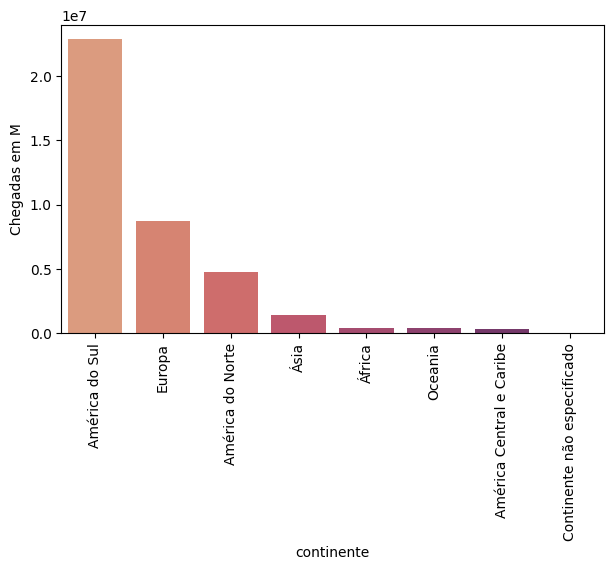

In [8]:
plt.figure(figsize=(7, 4))

sns.barplot(data=chegadas_continete, x='continente', y='chegadas',hue='continente', palette='flare', legend=False)
plt.xticks(rotation=90)
plt.ylabel('Chegadas em M')
plt.show()

### Visitantes de Cada Continente Por Ano

In [9]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

l = 0
c = 0 
list = [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
for i in list:
    cont_ano = df[df['ano'] == i].groupby('continente')['chegadas'].sum().reset_index().sort_values(by='chegadas', ascending=False)
    ax[l, c].bar(cont_ano['continente'], cont_ano['chegadas'])
    ax[l, c].set_title(i)

    if c == 3:
        c = 0
        l = l + 1
    else:
        c = c + 1

for ax in ax.flat:
    ax.tick_params(axis='x', rotation=90)
fig.tight_layout(pad=0.000000000)

# Visitantes Por País
- A argentina lidera em números de turistas no Brasil, seguida pelos Estados Unidos.

In [10]:
chegada_pais = df.groupby('país')['chegadas'].sum().nlargest(10).reset_index()
chegada_pais

país  chegadas
0       Argentina  12905804
1  Estados Unidos   3746593
2           Chile   2614090
3        Paraguai   2552890
4         Uruguai   2069784
5          França   1408851
6        Alemanha   1171047
7        Portugal   1106436
8          Itália    965265
9     Reino Unido    934175

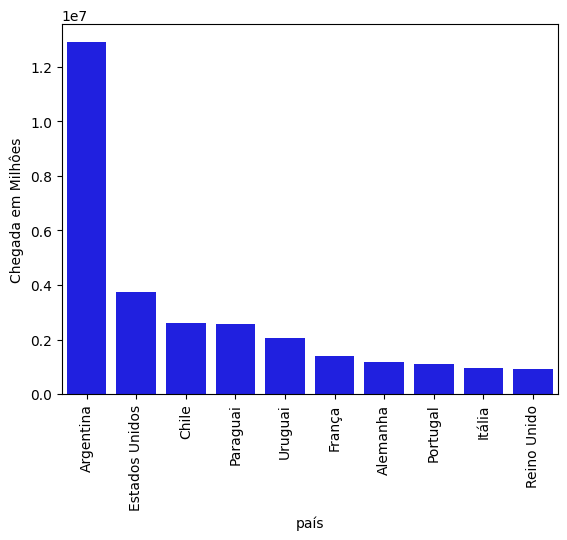

In [11]:
sns.barplot(data=chegada_pais, x='país', y='chegadas', color='blue')
plt.xticks(rotation=90)
plt.ylabel('Chegada em Milhôes')
plt.show()

# Forma de Chegada

In [12]:
chegada_vias = df.groupby('via')['chegadas'].sum().reset_index().sort_values(by='chegadas', ascending=False)
chegada_vias

via  chegadas
0      Aérea  21646572
4  Terrestre  12115635
1      Aéreo   3794260
3   Marítimo    649389
2    Fluvial    561728

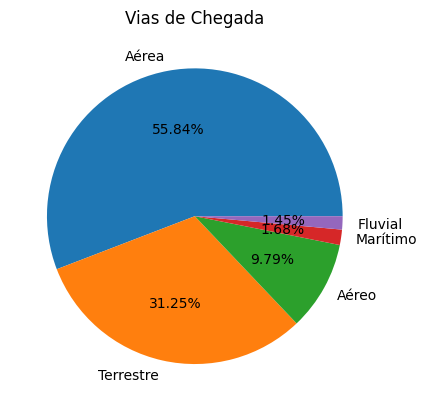

In [13]:
plt.pie(chegada_vias['chegadas'], labels=chegada_vias['via'], autopct='%1.2f%%')
plt.title('Vias de Chegada')
plt.show()

# Chegada de Turistas Por Ano

- Observa-se uma extrema queda de turismo nos ano de 20 e 21. Tal queda concerteza se dar pelo do COVID-19 ter assolado a população nesta época.
- Em 2020 houve uma queda de 66% em relação ao ano anterior.
- Em 2021 houve uma queda de 88% em relação a 2019 e 65% em relação ao ano anterior.
- Há uma recuperação no anos de 2022 e 2023.
- Em 2024 há uma alta até superior aos anos antes do COVID-19.

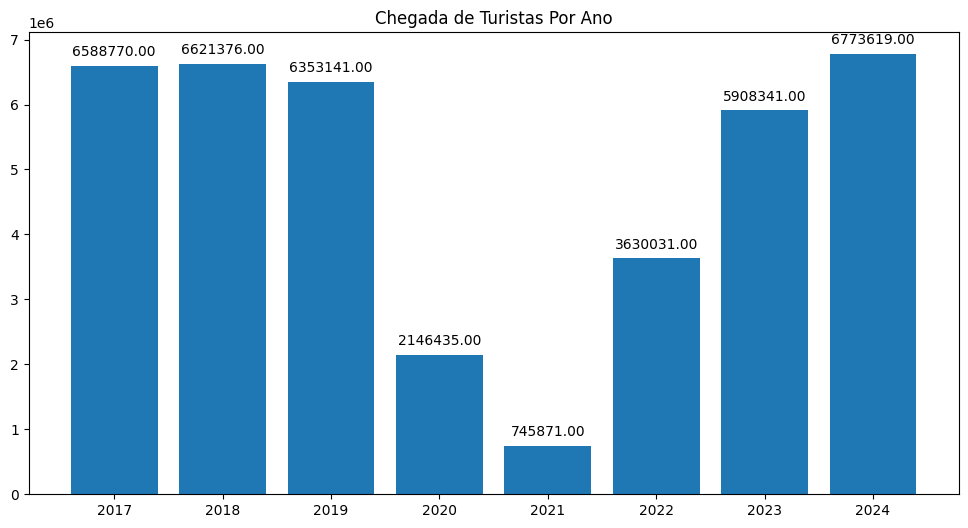

In [39]:
df_ano = df.groupby('ano')['chegadas'].sum().reset_index()

fig, ax = plt.subplots(figsize=(12,6))
lb = ax.bar(df_ano.ano, df_ano.chegadas)
ax.bar_label(lb, fmt="%.2f", padding=5)
plt.title('Chegada de Turistas Por Ano')
plt.show()

### Movimentação de Visitantes Por Ano
- No Mês de março de 2020 já é perceptível uma queda no número de turista. Motivo esse que se dar pela vírus do CIVID-19.
- Há um retorno na alta de turistas no mês outubro de 2019.

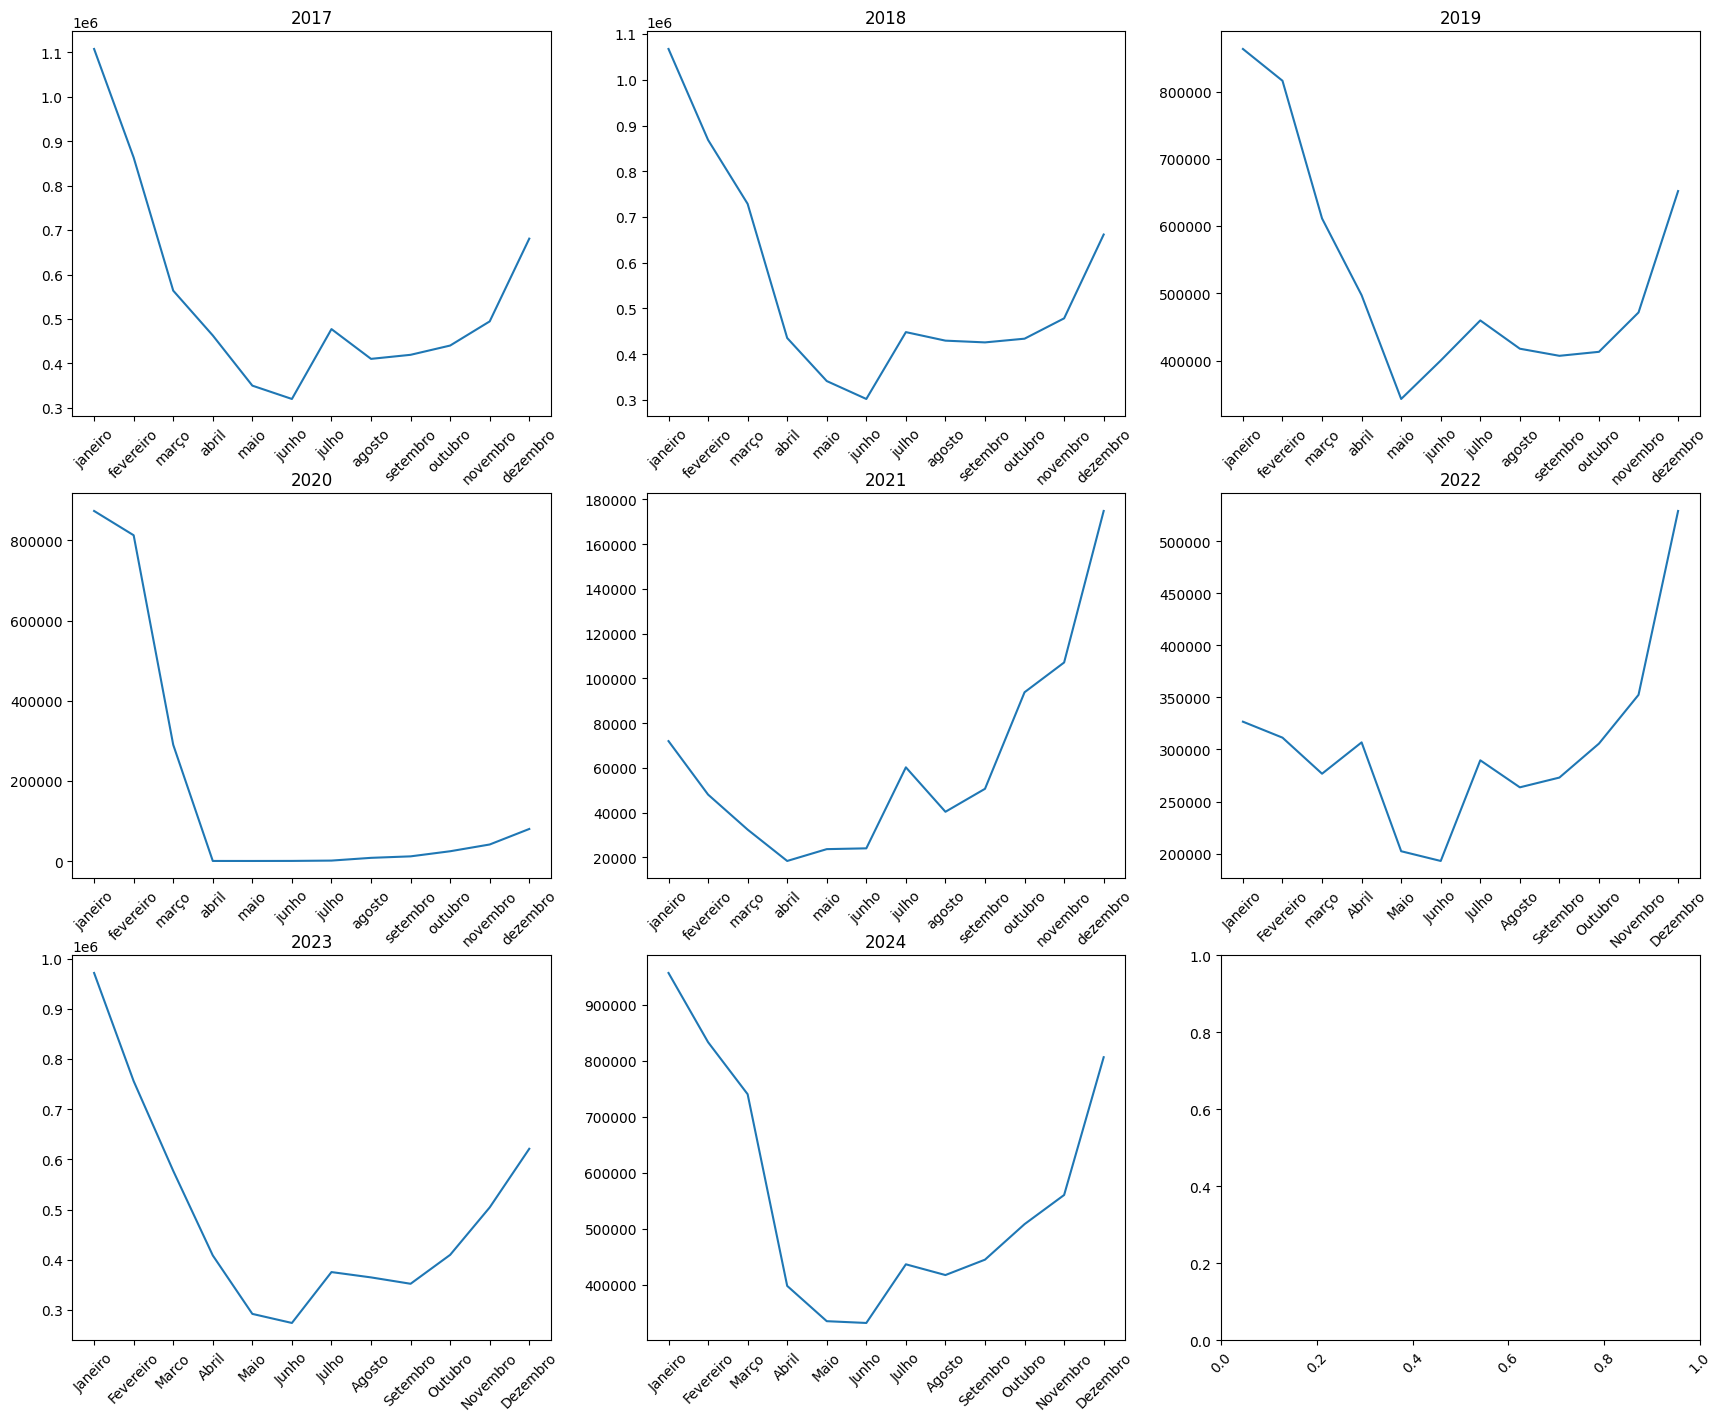

In [15]:

list = [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
fig, ax = plt.subplots(3, 3, figsize=(21, 17))

l = 0
c = 0
for i in list:
    ano_mes = df[df['ano'] == i].groupby(['mês', 'cod_mes'])['chegadas'].sum().reset_index().sort_values(by='cod_mes')
    ax[l, c].plot(ano_mes['mês'], ano_mes['chegadas'])
    ax[l, c].set_title(f'{i}')

    if c == 2:
        c = 0
        l = l + 1
    else:
        c = c + 1

for ax in ax.flat:
    ax.tick_params(axis="x", rotation=45)

# Estados Visitados
- São Paulo, Rio de Janeiro, Rio Grande do Sul e Paraná são os estados mais visitados.

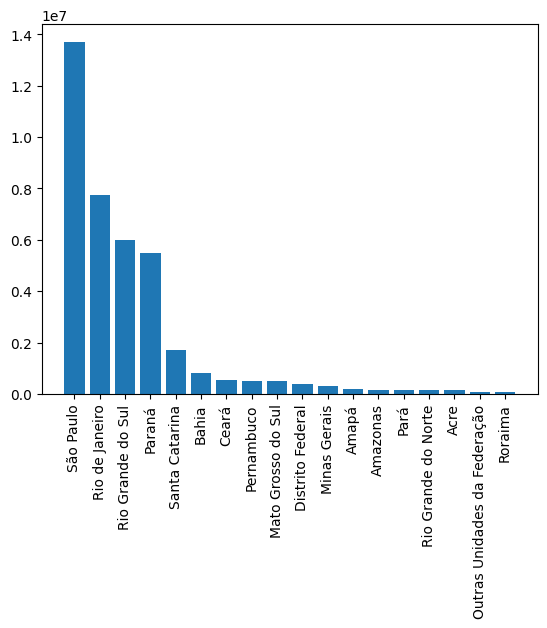

In [16]:
estados = df.groupby('uf')['chegadas'].sum().reset_index().sort_values(by='chegadas', ascending=False)
fig, ax = plt.subplots()
ax.bar(estados.uf, estados.chegadas)
plt.xticks(rotation=90)
plt.show()

### Movimentação em Cada Estado Por Mês
- Durante todo o ano São Paulo é o estado mais visitado.
- Somente em janeiro que os estado do Rio Grando do Sul se encontra no topo.

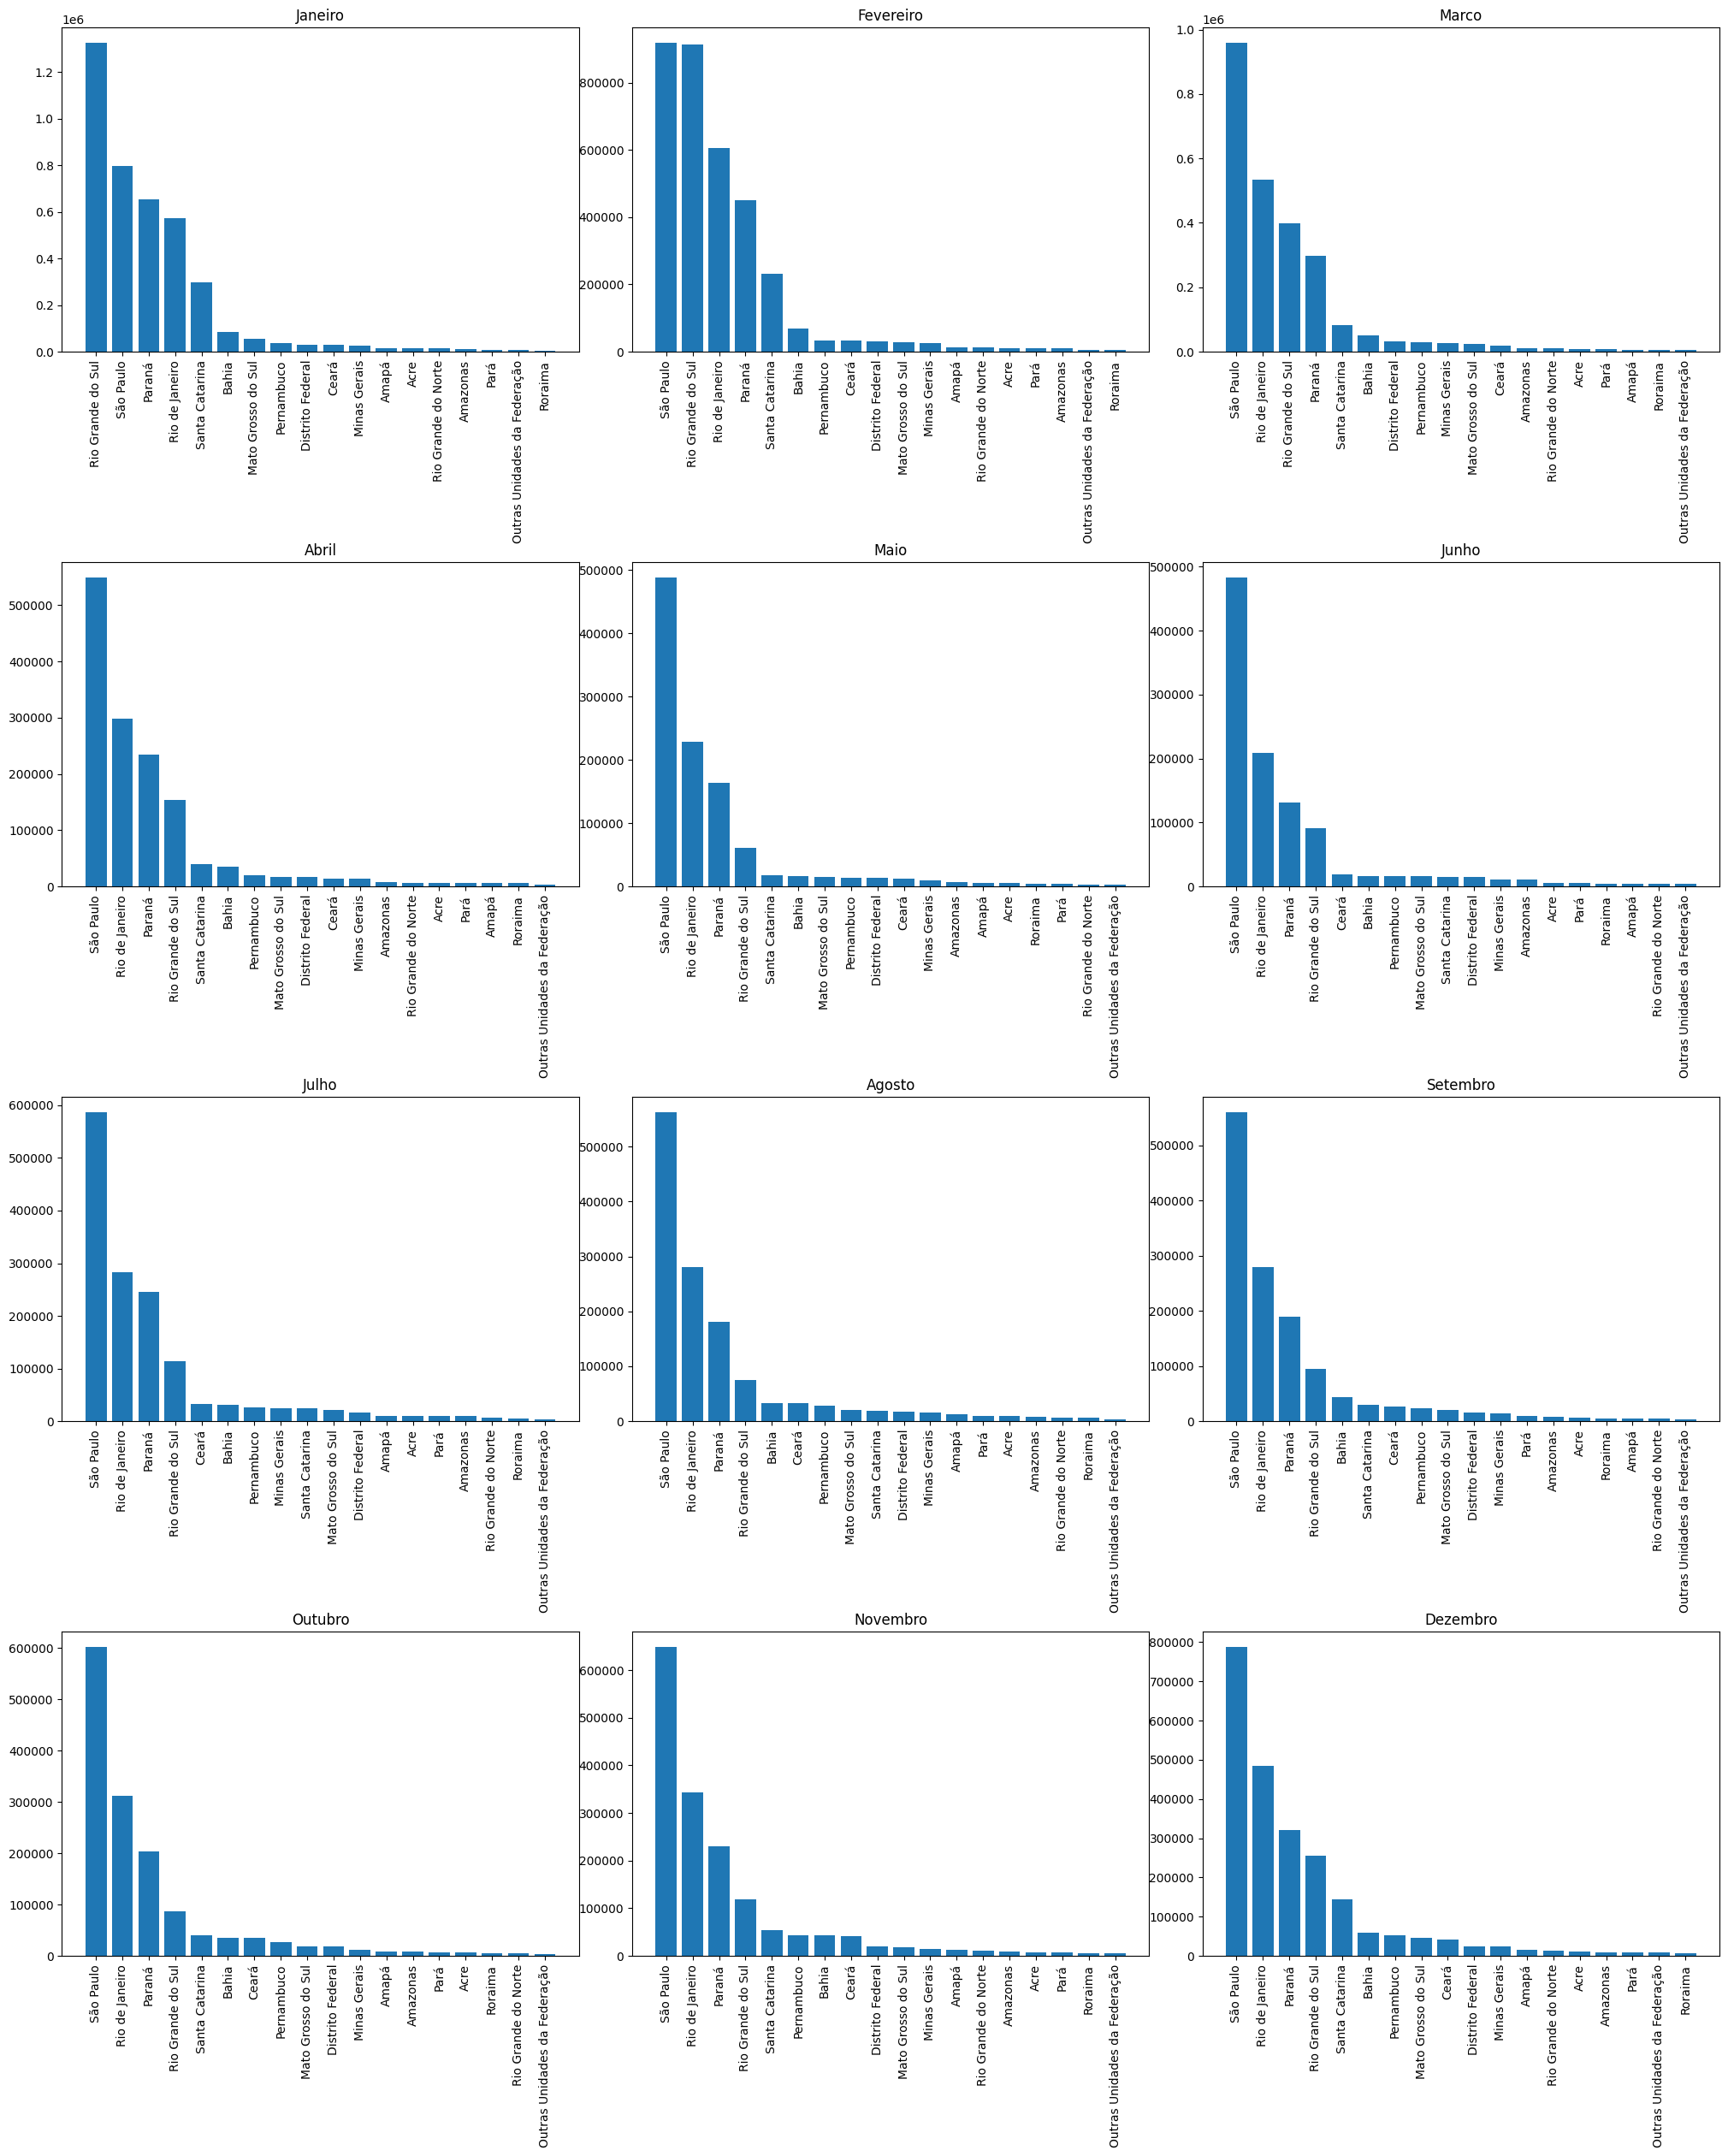

In [17]:
fig, ax = plt.subplots(4, 3, figsize=(20,25))
i = 1
l = 0
c = 0
while i < 13:
    mes_estado = df[df['cod_mes'] == i].groupby(['uf', 'mês'])['chegadas'].sum().reset_index().sort_values(by='chegadas', ascending=False)
    ax[l, c].bar(mes_estado.uf, mes_estado.chegadas)
    
    ax[l, c].set_title(f'{mes_estado['mês'][0]}')
    i = i + 1
    if c == 2:
        c = 0
        l = l + 1
    else:
        c = c + 1
for ax in ax.flat:
    ax.tick_params(axis="x", rotation=90)
fig.tight_layout(pad=0.000000000)


### Visitas em Cada Estado Por Ano
- No ano de 2021 houve um grande baixa nas visitas ao Rio Grande do Sul.


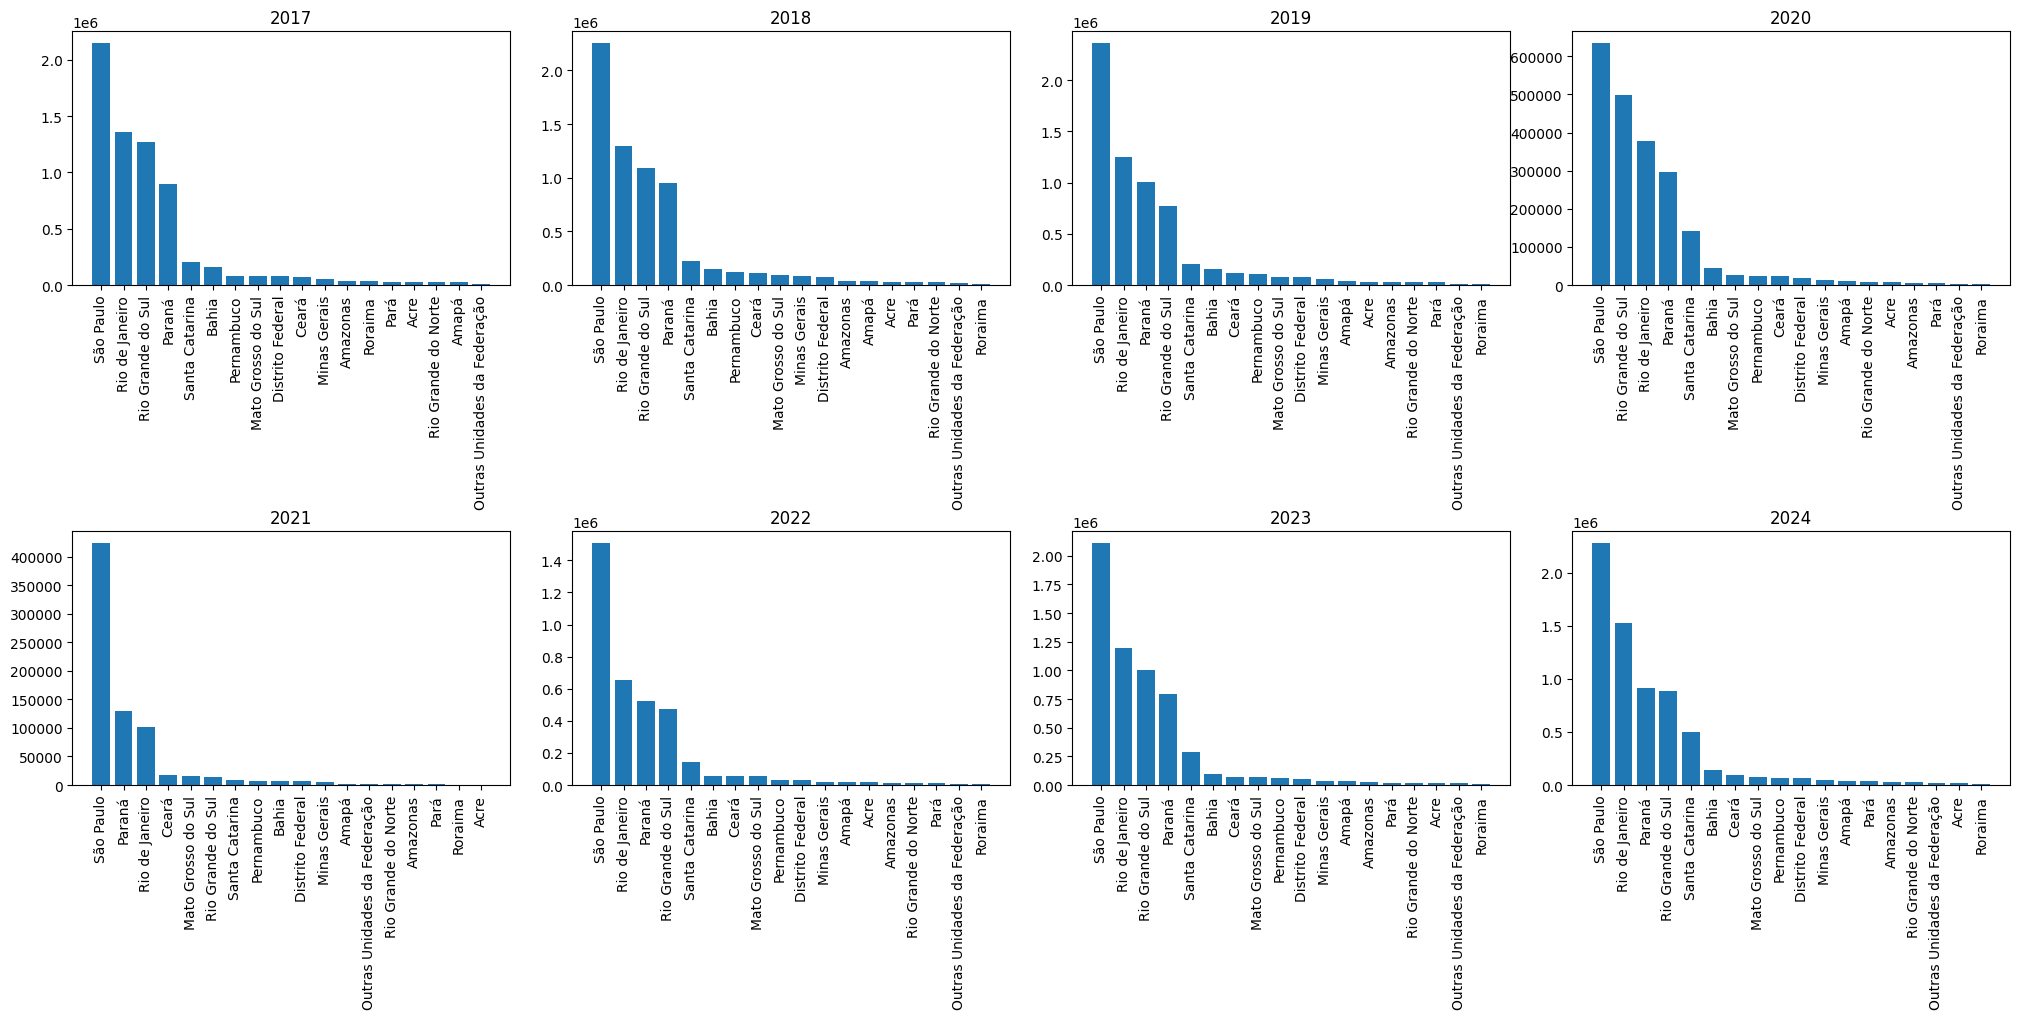

In [18]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

l = 0
c = 0
list = [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
for i in list:
    estado_ano = df[df['ano'] == i].groupby('uf')['chegadas'].sum().reset_index().sort_values(by='chegadas', ascending=False)
    ax[l, c].bar(estado_ano['uf'], estado_ano['chegadas'])
    ax[l, c].set_title(f'{i}')
    if c == 3:
        c = 0
        l = l + 1
    else:
        c = c + 1
for ax in ax.flat:
    ax.tick_params(axis="x", rotation=90)
fig.tight_layout(pad=0.000000000)

# Preferencia de estados pelos argentinos, americanos e chilenos

### Argentina

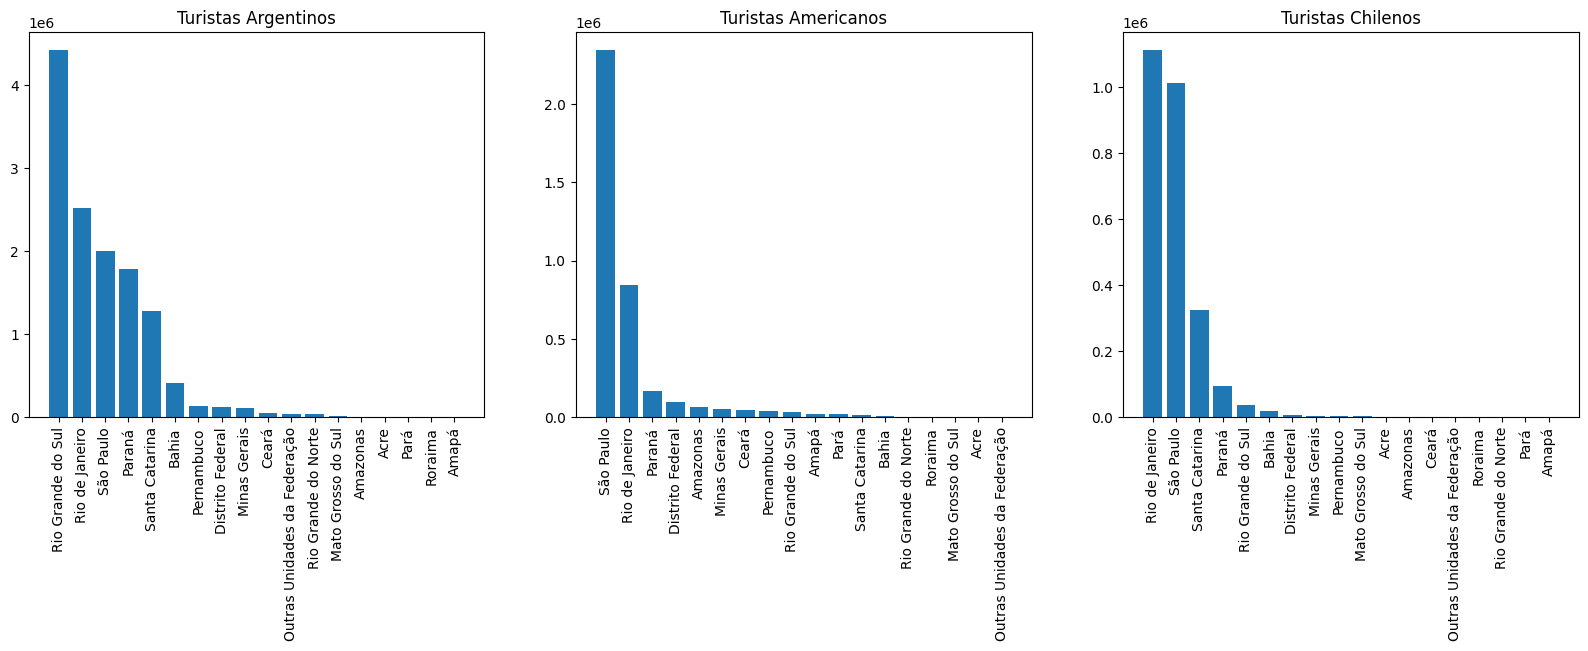

In [40]:
estado_arg = df[df['país'] == 'Argentina'].groupby('uf')['chegadas'].sum().reset_index().sort_values(by='chegadas', ascending=False)
estado_eua = df[df['país'] == 'Estados Unidos'].groupby('uf')['chegadas'].sum().reset_index().sort_values(by='chegadas', ascending=False)
estado_chi = df[df['país'] == 'Chile'].groupby('uf')['chegadas'].sum().reset_index().sort_values(by='chegadas', ascending=False)


fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].bar(estado_arg.uf, estado_arg.chegadas)
ax[0].set_title('Turistas Argentinos')
ax[1].bar(estado_eua.uf, estado_eua.chegadas)
ax[1].set_title('Turistas Americanos')
ax[2].bar(estado_chi.uf, estado_chi.chegadas)
ax[2].set_title('Turistas Chilenos')

for ax in ax.flat:
    ax.tick_params(axis="x", rotation=90)
plt.show()